<a href="https://colab.research.google.com/github/yoonkim313/dataCampusProject-Team10/blob/master/ocr/deep-text-recognition/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This can be executed in https://colab.research.google.com "Python 3 / GPU" runtime.

In [ ]:
!git clone https://github.com/yoonkim313/dataCampusProject-Team10.git

In [ ]:
% cd /content/dataCampusProject-Team10/ocr/deep-text-recognition/

train_model

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 train.py \
--train_data /content/drive/'Shared drives'/'BigDATA TEAM 10'/ocr/data/training \
--valid_data /content/drive/'Shared drives'/'BigDATA TEAM 10'/ocr/data/validation \
--workers 10 \
--num_iter 2000 \
--valInterval 30000 \
--manualSeed 7777 \
--Transformation TPS \
--FeatureExtraction VGG \
--SequenceModeling BiLSTM \
--Prediction Attn
'''
Transformation            None|TPS
FeatureExtraction         VGG|RCNN|ResNet
SequenceModeling          None|BiLSTM
Prediction                CTC|Attn
'''

test_model

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 test.py \
--eval_data /content/drive/'Shared drives'/'BigDATA TEAM 10'/ocr/data/ \
--benchmark_all_eval \
--Transformation TPS \
--FeatureExtraction VGG \
--SequenceModeling BiLSTM \
--Prediction Attn \
--saved_model /content/drive/'Shared drives'/'BigDATA TEAM 10'/ocr/model/best_accuracy.pth

In [ ]:
output = !CUDA_VISIBLE_DEVICES=0 python3 demo.py \
--Transformation TPS \
--FeatureExtraction VGG \
--SequenceModeling BiLSTM \
--Prediction Attn \
--image_folder test_image \
--saved_model /content/drive/'Shared drives'/'BigDATA TEAM 10'/ocr/model/best_accuracy.pth

In [ ]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path \t predicted_labels \t confidence score')+2:]):
    row = row.split('\t')
    filename = row[0].strip()
    label = row[1].strip()
    conf = row[2].strip()
    img = Image.open(filename)
    img_buffer = io.BytesIO()
    img.save(img_buffer, format="PNG")
    imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8")
    
    data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
    data.loc[ind, 'id'] = filename
    data.loc[ind, 'label'] = label
    data.loc[ind, 'conf'] = conf
    
html_all = data.to_html(escape=False)
display(HTML(html_all))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!pwd

/workspace/dataCampusProject-Team10/dataCampusProject-Team10/ocr/deep-text-recognition


In [3]:
df = pd.read_csv('/workspace/dataCampusProject-Team10/dataCampusProject-Team10/ocr/saved_models/acc_loss.txt',sep=',')

In [115]:
df = df[df.index % 5 ==0]

In [116]:
df = df.loc[:2500]

In [117]:
df.tail()

,Iteration,Train_loss,Valid_loss,Current_accuracy,Current_norm_ED
2480,[2481/300000],0.00139,0.00143,100.000,1.00
2485,[2486/300000],0.00132,0.00141,100.000,1.00
2490,[2491/300000],0.00140,0.00128,100.000,1.00
2495,[2496/300000],0.00138,0.02355,98.496,0.99
2500,[2501/300000],0.00147,0.00296,100.000,1.00


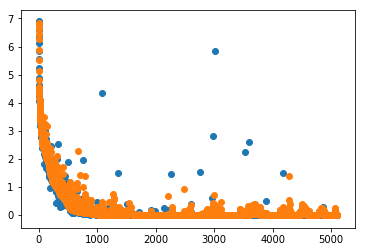

In [4]:
plt.scatter(df.index, df.Train_loss)
plt.scatter(df.index, df.Valid_loss)
# plt.scatter(df.index, df.Current_accuracy)

In [29]:
df.Train_loss = df.Train_loss *10

In [30]:
df.Valid_loss = df.Valid_loss *10

In [32]:
plt.scatter(df.Train_loss)
plt.scatter(df.Valid_loss)
plt.scatter(df.Current_accuracy)

TypeError: scatter() missing 1 required positional argument: 'y'

In [15]:
plt.plot('Train_loss',  # x

         'Valid_loss',  # y

         data=loss, 

         linestyle='none', 

         marker='o', 

         markersize=10,

         color='blue', 

         alpha=0.5)

plt.title('Scatter Plot of loss by matplotlib', fontsize=20)

plt.xlabel('Petal Train_loss', fontsize=14)

plt.ylabel('Valid_loss Width', fontsize=14)

plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'